<a href="https://colab.research.google.com/github/ansumanpandey/ExploratoryDataAnalysisbyme/blob/main/Practiceinfob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
emp_data = {
    'Emp_ID': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11$'],
    'Name': ['John', 'Smith', 'Jane', 'Doe', 'Mike', 'Emily', 'Chris', 'David', 'Sarah', 'Tom','@m!r'],
    'Department': ['HR', 'IT', 'Dev', 'HR', 'Finance', 'Finance', 'IT', 'HR', 'Finance', 'IT',''],
    'Salary': [50000.00, 60000.00, 55000.02, 48000.00, 70000.90, 65000.99, 62000.80, None, 71000.99, 59000.00,'NaN'],
'Technology' : ['Java','Python','ML','AI','PowerBI','NaN','Tableau','DL','AWS','','Python' ],
    '=>Task_ID': ['TS001','TS002','NaN','TS004','TS005','TS006','','','TS009','TS010',None]
}
import pandas as pd
df = pd.DataFrame(emp_data)

In [ ]:
df.columns = ['Emp_ID', 'Name', 'Department', 'Salary', 'Technology', 'Task_ID']


In [ ]:
df

,Emp_ID,Name,Department,Salary,Technology,Task_ID
0,1,John,HR,50000.0,Java,TS001
1,2,Smith,IT,60000.0,Python,TS002
2,3,Jane,Dev,55000.02,ML,NaN
3,4,Doe,HR,48000.0,AI,TS004
4,5,Mike,Finance,70000.9,PowerBI,TS005
5,6,Emily,Finance,65000.99,NaN,TS006
6,7,Chris,IT,62000.8,Tableau,
7,8,David,HR,None,DL,
8,9,Sarah,Finance,71000.99,AWS,TS009
9,10,Tom,IT,59000.0,,TS010


In [ ]:
df['Emp_ID']= df['Emp_ID'].str.replace('$','')

In [ ]:
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')
df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [ ]:
df['Salary']=df['Salary'].round(2)

In [ ]:
import numpy as np
df['Department'].replace('', np.nan, inplace=True)
df['Department'].fillna(method='ffill', inplace=True)

In [ ]:
df['Technology'].replace('', np.nan, inplace=True)
df['Technology'].replace('NaN', np.nan, inplace=True)
df['Technology'].fillna(method='ffill', inplace=True)

In [ ]:
df['Task_ID'].replace('NaN', np.nan, inplace=True)
df['Task_ID'].fillna(value=np.nan, inplace=True)
df['Task_ID'].replace('', np.nan, inplace=True)



In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Extract the numeric part of Task_ID and convert to integer
df['Task_ID_num'] = df['Task_ID'].str.extract('(\d+)').astype(float)

# Find the maximum number in the sequence
max_task_id = df['Task_ID_num'].max()


In [ ]:
    max_task_id=max_task_id+1.0
    for i in range(0,int(max_task_id)):
      if df['Task_ID'].iloc[i] is np.nan:
          print(i)
          df['Task_ID'].iloc[i]=f"TS{int(i+1):03d}" # Format to match existing ID style, e.g., TS001, TS002






2
6
7
10


In [ ]:
df=df.drop('Task_ID_num',axis=1)

In [ ]:
df

,Emp_ID,Name,Department,Salary,Technology,Task_ID
0,1,John,HR,50000.00,Java,TS001
1,2,Smith,IT,60000.00,Python,TS002
2,3,Jane,Dev,55000.02,ML,TS003
3,4,Doe,HR,48000.00,AI,TS004
4,5,Mike,Finance,70000.90,PowerBI,TS005
5,6,Emily,Finance,65000.99,PowerBI,TS006
6,7,Chris,IT,62000.80,Tableau,TS007
7,8,David,HR,60000.41,DL,TS008
8,9,Sarah,Finance,71000.99,AWS,TS009
9,10,Tom,IT,59000.00,AWS,TS010


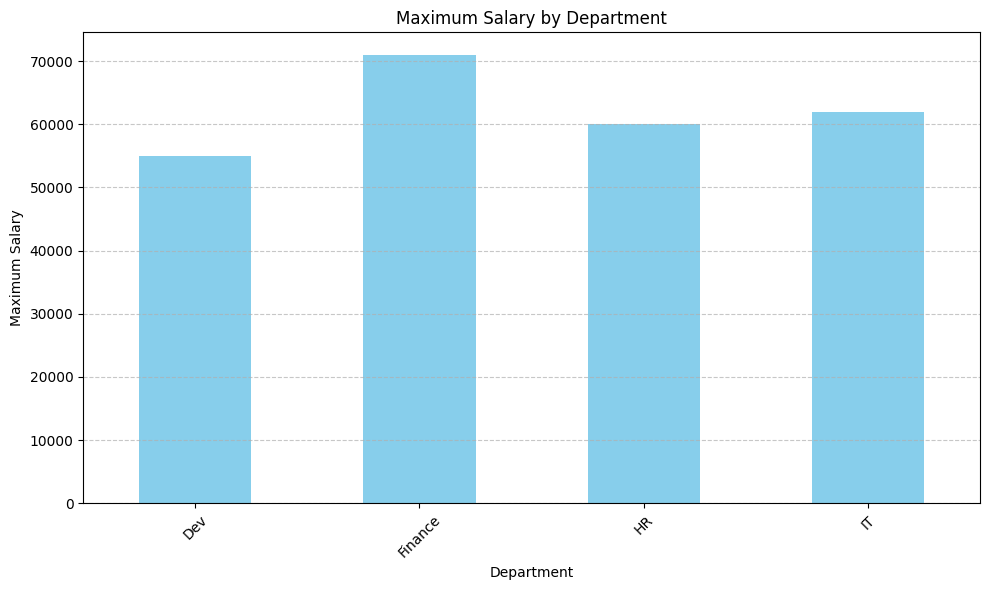

In [ ]:
import matplotlib.pyplot as plt

# Group by department and find the maximum salary
max_salary_by_dept = df.groupby('Department')['Salary'].max()

# Plot the data
plt.figure(figsize=(10, 6))
max_salary_by_dept.plot(kind='bar', color='skyblue')
plt.title('Maximum Salary by Department')
plt.xlabel('Department')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3.Provide the correlation ship of features for both numerical and categorical.


In [ ]:
numerical_features = ['Salary']
numerical_corr = df[numerical_features].corr()

print("Correlation Matrix for Numerical Features:")
print(numerical_corr)


Correlation Matrix for Numerical Features:
        Salary
Salary     1.0


This will give you a correlation matrix showing how each numerical feature correlates with every other numerical feature. Since you only have one numerical feature (Salary), the output will be a 1x1 matrix, showing the correlation of Salary with itself.

For categorical features, you can calculate the correlation using methods like Cramér's V, which is applicable for categorical-categorical association. However, it's not directly implemented in pandas, but you can use libraries like scipy.stats or researchpy. Here's how you can do it using researchpy:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Define your categorical features
categorical_features = ['Department', 'Technology', 'Task_ID']

# Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V for each pair of categorical features
categorical_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1 in categorical_features:
    for col2 in categorical_features:
        corr = cramers_v(df[col1], df[col2])
        categorical_corr.loc[col1, col2] = corr

print("Correlation Matrix for Categorical Features:")
print(categorical_corr)




Correlation Matrix for Categorical Features:
           Department Technology Task_ID
Department        1.0   0.538222     NaN
Technology   0.538222        1.0     NaN
Task_ID           NaN        inf     inf


<ipython-input-20-d9c421794bca>:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-20-d9c421794bca>:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-20-d9c421794bca>:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-20-d9c421794bca>:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-20-d9c421794bca>:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


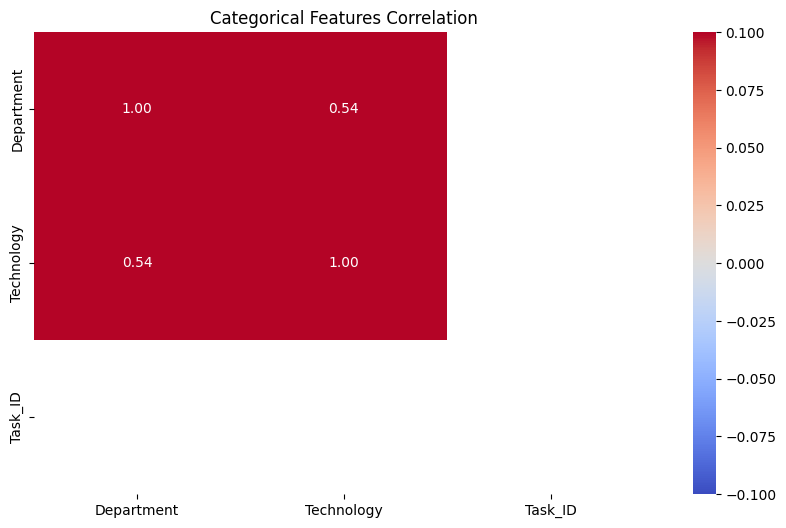

In [ ]:
import seaborn as sns

# Convert values in the categorical_corr DataFrame to numeric
categorical_corr_numeric = categorical_corr.apply(pd.to_numeric)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(categorical_corr_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Features Correlation')
plt.show()
